<a href="https://colab.research.google.com/github/isapansoni/pneumonia_detection_transfer_learning/blob/master/pneumonia_detection_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown https://drive.google.com/uc?id=17byJj-Ewg5G-w36XDt77HavuVKlryVpJ

Downloading...
From: https://drive.google.com/uc?id=17byJj-Ewg5G-w36XDt77HavuVKlryVpJ
To: /content/chest_xray.zip
1.24GB [00:11, 152MB/s]


In [0]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from PIL import Image
from tensorflow.keras.applications import InceptionV3
import cv2

In [3]:
!unzip chest_xray.zip

Archive:  chest_xray.zip
   creating: chest_xray/
  inflating: chest_xray/.DS_Store    
   creating: __MACOSX/
   creating: __MACOSX/chest_xray/
  inflating: __MACOSX/chest_xray/._.DS_Store  
   creating: chest_xray/test/
  inflating: chest_xray/test/.DS_Store  
   creating: __MACOSX/chest_xray/test/
  inflating: __MACOSX/chest_xray/test/._.DS_Store  
   creating: chest_xray/test/PNEUMONIA/
  inflating: chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg  
   creating: __MACOSX/chest_xray/test/PNEUMONIA/
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person147_bacteria_706.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person100_bacteria_482.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUMONIA/._person78_bacteria_382.jpeg  
  inflating: chest_xray/test/PNEUMONIA/person124_bacteria_589.jpeg  
  inflating: __MACOSX/chest_xray/test/PNEUM

In [4]:
!ls chest_xray/

test  train  val


In [0]:
!ls chest_xray/train/PNEUMONIA/

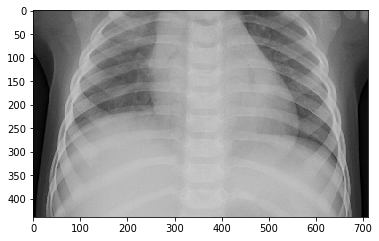

In [6]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('chest_xray/train/PNEUMONIA/person1_bacteria_1.jpeg', cv2.IMREAD_COLOR)
plt.imshow(image)

In [0]:
image.shape
height , width, channels = image.shape

In [8]:
from tensorflow.keras.applications import InceptionV3
base_model=InceptionV3(weights='imagenet', include_top=False, input_shape=(height,width,channels))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
87916544/87910968 [==============================] - 4s 0us/step


In [9]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 439, 712, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 219, 355, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 219, 355, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 219, 355, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [0]:
model = models.Sequential()
model.add(base_model)
# model.add(layers.Conv2D(filters=1024, kernel_size=(2,2),activation='relu'))
model.add(layers.Flatten())
# model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  #Sigmoid function at the end because we have just two classes

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=2e-3), metrics=['acc'])

In [14]:
batch_size = 16
train_datagen = ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    rotation_range=40,
#                                     width_shift_range=0.2,
#                                     height_shift_range=0.2,
#                                     shear_range=0.2,
#                                     zoom_range=0.2,
#                                     horizontal_flip=True,
#                                     fill_mode='nearest'
                                  )

val_datagen = ImageDataGenerator(rescale=1./255)  #We do not augment validation data. we only perform rescale

#Create the image generators
train_generator = train_datagen.flow_from_directory(
        'chest_xray/train',
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        'chest_xray/val',
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [15]:

history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data=validation_generator)


Epoch 1/10
326/326 [==============================] - 661s 2s/step - loss: 2.0841 - acc: 0.7168 - val_loss: 0.8253 - val_acc: 0.5000
Epoch 2/10
326/326 [==============================] - 634s 2s/step - loss: 0.6032 - acc: 0.7494 - val_loss: 0.8315 - val_acc: 0.5625
Epoch 3/10
326/326 [==============================] - 641s 2s/step - loss: 0.5519 - acc: 0.8508 - val_loss: 0.8261 - val_acc: 0.6250
Epoch 4/10
326/326 [==============================] - 642s 2s/step - loss: 0.2834 - acc: 0.9028 - val_loss: 1.5670 - val_acc: 0.6250
Epoch 5/10
326/326 [==============================] - 640s 2s/step - loss: 0.1746 - acc: 0.9356 - val_loss: 0.2982 - val_acc: 0.7500
Epoch 6/10
326/326 [==============================] - 639s 2s/step - loss: 0.1761 - acc: 0.9350 - val_loss: 1.3877 - val_acc: 0.6250
Epoch 7/10
326/326 [==============================] - 640s 2s/step - loss: 0.1559 - acc: 0.9450 - val_loss: 1.4298 - val_acc: 0.5625
Epoch 8/10
326/326 [==============================] - 643s 2s/step - 

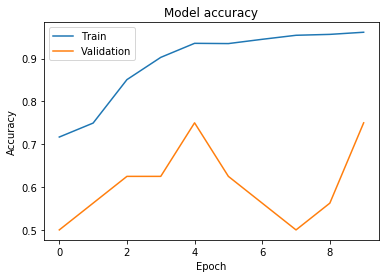

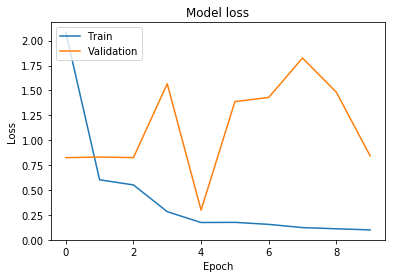

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)  #We do not augment validation data. we only perform rescale

#Create the image generators
test_generator = test_datagen.flow_from_directory(
        'chest_xray/test',
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='binary')

Found 624 images belonging to 2 classes.


In [18]:
evaluate = model.evaluate_generator(test_generator, verbose=1)

39/39 [==============================] - 20s 517ms/step - loss: 0.9515 - acc: 0.8013


In [0]:
predict = model.predict_on_batch(test_generator.next())

In [0]:
val_names_p = ['person1_virus_6.jpeg', 'person1_virus_7.jpeg', 'person1_virus_8.jpeg', 'person1_virus_9.jpeg']
val_names_n = ['IM-0001-0001.jpeg', 'IM-0003-0001.jpeg', 'IM-0005-0001.jpeg', 'IM-0006-0001.jpeg']
label_dict = {0:'Pneumonia', 1:'Normal'}

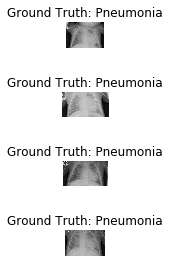

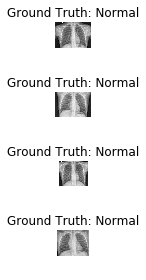

In [21]:
for i, name in enumerate(val_names_p):
    image = cv2.imread('chest_xray/test/PNEUMONIA/'+name, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    title = 'Ground Truth: ' + label_dict[0]
    plt.subplot(4, 1,i+1)
    plt.title(title)
    plt.axis('off')
    plt.imshow(image)
plt.tight_layout()
plt.show()

for i, name in enumerate(val_names_n):
    image = cv2.imread('chest_xray/test/NORMAL/'+name, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    title = 'Ground Truth: ' + label_dict[1]
    plt.subplot(4, 1,i+1)
    plt.title(title)
    plt.axis('off')
    plt.imshow(image)
plt.tight_layout()
plt.show()